In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# 📌 **Step 1: Read the weights of the 60 selected stocks**
# Read the top 60 stocks from the optimal portfolio
portfolio_file = "optimal_portfolio_top60.csv"
portfolio_df = pd.read_csv(portfolio_file)

# Get the list of selected stocks and their corresponding weights
selected_stocks = portfolio_df['Stock'].tolist()
stock_weights = portfolio_df.set_index('Stock')['Weight'].to_dict()

# Set the folder path where stock data is stored
data_directory = "SP500_21_25"


In [2]:
# 📌 **Step 2: Read closing price data**
# Create a DataFrame to store the closing prices of all selected stocks
price_data = pd.DataFrame()

for ticker in selected_stocks:
    file_path = os.path.join(data_directory, f"{ticker}.csv")
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Process the date column and ensure data is sorted by time
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        
        # Keep only the Close price
        price_data[ticker] = df['Close']
    else:
        print(f"⚠️ File not found: {ticker}")

# Ensure the data is sorted by date
price_data.sort_index(inplace=True)


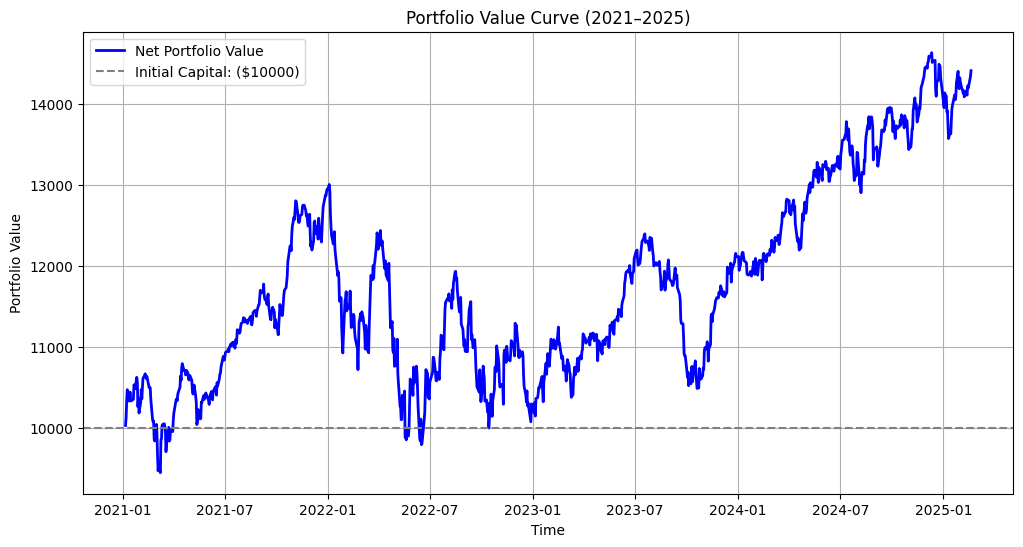

✅ Portfolio value curve has been calculated and saved as 'portfolio_value_2021_2025.csv'


In [3]:
# 📌 **Step 3: Calculate daily returns**
# Compute simple returns (percentage change)
returns = price_data.pct_change().dropna()

# 📌 **Step 4: Calculate portfolio daily returns**
# Compute the daily return of the portfolio
portfolio_returns = returns.dot(pd.Series(stock_weights))

# Set initial capital
initial_capital = 10000

# Compute cumulative portfolio value curve
portfolio_value = (1 + portfolio_returns).cumprod() * initial_capital

# 📌 **Step 5: Plot the portfolio performance curve**
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label="Net Portfolio Value", color='b', linewidth=2)
plt.axhline(y=initial_capital, color='gray', linestyle='--', label="Initial Capital: ($10000)")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value Curve (2021–2025)")
plt.legend()
plt.grid(True)
plt.show()

# **Optional: Save the result**
portfolio_value.to_csv("portfolio_value_2021_2025.csv")
print("✅ Portfolio value curve has been calculated and saved as 'portfolio_value_2021_2025.csv'")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


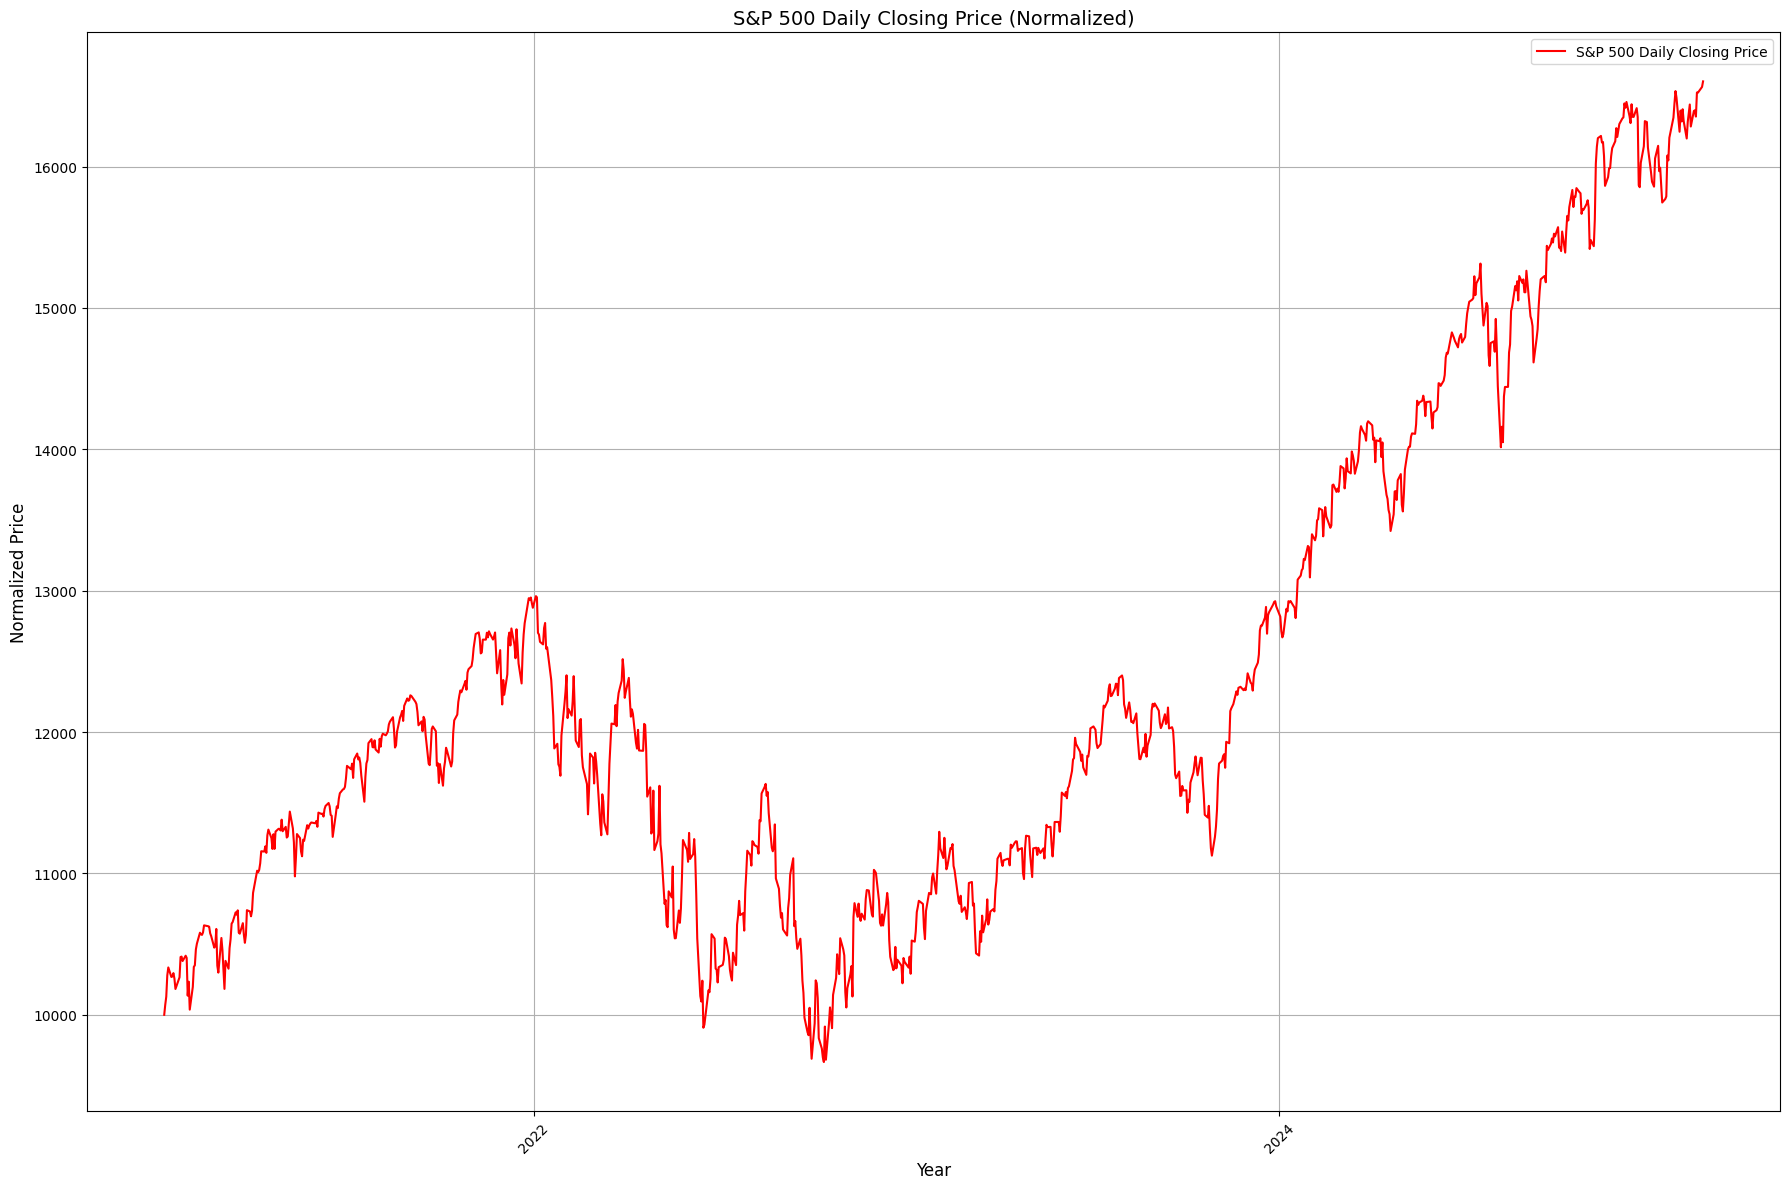

In [4]:
import matplotlib.dates as mdates
import yfinance as yf

# Download S&P 500 daily closing price data
data = yf.download('^GSPC', start='2021-01-01', end='2025-02-20')

# Get closing prices
close_prices = data['Close']

# Normalize closing prices: set the starting point to 10,000
normalized_close = 10000 * (close_prices / close_prices.iloc[0])

# Create chart
plt.figure(figsize=(18, 12))
plt.plot(close_prices.index, normalized_close, label='S&P 500 Daily Closing Price', color='r')

# Set x-axis to years
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)
plt.title('S&P 500 Daily Closing Price (Normalized)', fontsize=14)

# Format x-axis: display a tick every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # One tick every 2 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Display only the year

# Beautify the plot
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate ticks to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
